שם התלמיד



.............................

# Google Colab notebook for teaching and practicing Keras for a computer vision classification problem using the MNIST dataset

# **Import Libraries**

In [ ]:
import numpy as np

np.set_printoptions(precision=6, linewidth=200)
np.set_printoptions(suppress=True) #suppress scientific notation

import matplotlib.pyplot as plt

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.datasets import mnist

from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay\

from sklearn import metrics, model_selection

TensorFlow version: 2.15.0


# **1. Data Preparation**

## 1.1 Understanding The MNIST dataset

The MNIST dataset consists of 70,000 handwritten digits (0 through 9).

The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits, each of size 28x28 pixels.
It's divided into a training set of 60,000 images and a test set of 10,000 images.
The goal is to build a model that can correctly classify the images into the 10 digit classes (0 through 9).

Each image in the dataset is represented as a 28x28 matrix of pixel values. Each element in the matrix corresponds to the intensity of a pixel, ranging from 0 (white) to 255 (black).

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the shape of training data
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


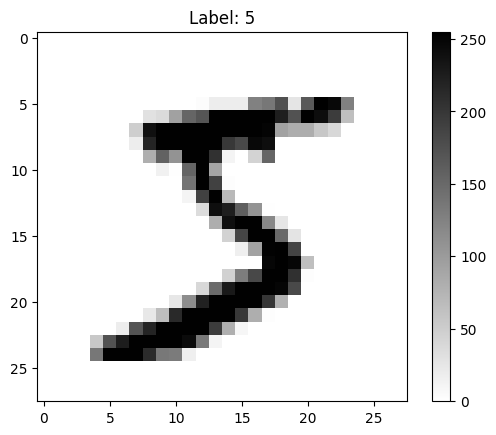

In [ ]:
# Display the first image
# cmap=plt.cm.binary argument sets the colormap to "binary," which displays the image in grayscale.
plt.imshow(train_images[0], cmap=plt.cm.binary)
# Sets the title of the plot to show the label of the first image.
plt.title(f'Label: {train_labels[0]}')
# Optional: Adds a color bar to indicate the scale of pixel values
plt.colorbar()
plt.show()

In [ ]:
# Display the first image as a matrix of numbers
print("The first item is number:", train_labels[0])
print(train_images[0])

The first item is number: 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 25

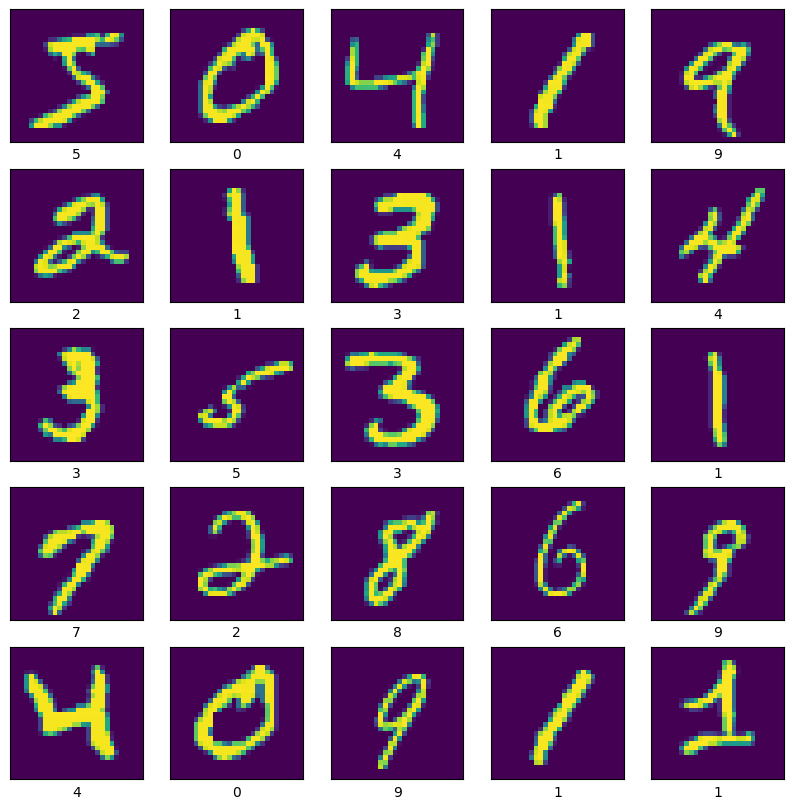

In [ ]:
plt.figure(figsize=(10,10)) #figure size of 10x10 inches.
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])            #remove the x ticks (the numerical markings on the axes) for each subplot
  plt.yticks([])            #remove the y ticks (the numerical markings on the axes) for each subplot
  plt.grid(False)
  plt.imshow(train_images[i]) #imshow function, which is used to plot image data
  plt.xlabel(train_labels[i])

## 1.2 Normalize the images to have values between 0 and 1
Normalizing the pixel values to the range [0, 1] makes the network easier to train, as smaller values are more manageable.

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
# Normalize the images to have values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

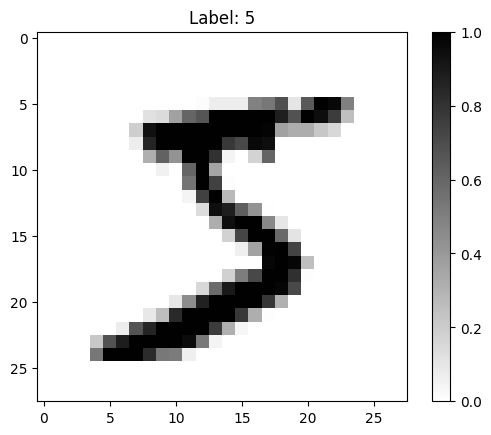

In [ ]:
# Display again the first image

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(f'Label: {train_labels[0]}')
plt.colorbar()
plt.show()

# **2. Building a Neural Network Model for Digit Classification**
The neural network consisting of an input layer, hidden layers, and an output layer.

In [ ]:
# Define the model
model = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

# - Flatten layer converts the 28x28 images into a 1D array of 784 pixels.
# - the first Dense layer hass 128 neurons, each connected to all inputs, with relu activation.
# - The final Dense layer has 10 neurons (one for each digit), using softmax to output probabilities.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **3. Compiling the Model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# optimizer='adam': Adaptive moment estimation, a popular optimization algorithm.
# loss='sparse_categorical_crossentropy': Suitable for multi-class classification problems.
# metrics=['accuracy']: To monitor the training and testing steps.

# **4. Training the Model**
Fit the model to the training data, using the validation split to evaluate its performance on unseen data.

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# epochs=10: The model will go through the training data 10 times.
# validation_split=0.2: Uses 20% of the training data as validation data.

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2850 - accuracy: 0.9191 - val_loss: 0.1525 - val_accuracy: 0.9561
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1308 - accuracy: 0.9617 - val_loss: 0.1183 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0869 - accuracy: 0.9736 - val_loss: 0.1002 - val_accuracy: 0.9683
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0640 - accuracy: 0.9809 - val_loss: 0.0941 - val_accuracy: 0.9723
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0903 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0895 - val_accuracy: 0.9723
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0936 - val_accuracy

In [ ]:
history.history

{'loss': [0.29168686270713806,
  0.13097411394119263,
  0.08923228085041046,
  0.06699574738740921,
  0.05051722750067711,
  0.039240457117557526,
  0.03092842921614647,
  0.026703882962465286,
  0.019876280799508095,
  0.01563914865255356],
 'accuracy': [0.9169999957084656,
  0.9612083435058594,
  0.9741250276565552,
  0.9795416593551636,
  0.9851250052452087,
  0.9884999990463257,
  0.9908124804496765,
  0.992020845413208,
  0.9943958520889282,
  0.9956666827201843],
 'val_loss': [0.17064236104488373,
  0.12634322047233582,
  0.10098326951265335,
  0.09071364253759384,
  0.08309787511825562,
  0.08428113907575607,
  0.09601576626300812,
  0.09101755917072296,
  0.08578813821077347,
  0.09498514980077744],
 'val_accuracy': [0.950166642665863,
  0.9620000123977661,
  0.9700833559036255,
  0.9725000262260437,
  0.9760000109672546,
  0.9750000238418579,
  0.9724166393280029,
  0.9745833277702332,
  0.9760000109672546,
  0.9764166474342346]}

# **5. Prediction**

In [ ]:
# Predict the probabilities for each class
y_pred_probs = model.predict(test_images)
print(y_pred_probs.shape)
print(y_pred_probs[:3])
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred.shape)
print(y_pred[:3])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[0.       0.       0.       0.000091 0.       0.       0.       0.999908 0.       0.000001]
 [0.       0.       1.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.998844 0.000143 0.000001 0.000001 0.       0.000004 0.000521 0.000486 0.      ]]
(10000,)
[7 2 1]


In [ ]:
# Summarizing the probabilities
np.sum(y_pred_probs,axis=1)

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

# **6. Evaluating Model Performance**

Assess the model's performance on the test set (data not seen during training).

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# This measures how well the model performs on the test dataset.

313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9769
Test accuracy: 0.9768999814987183


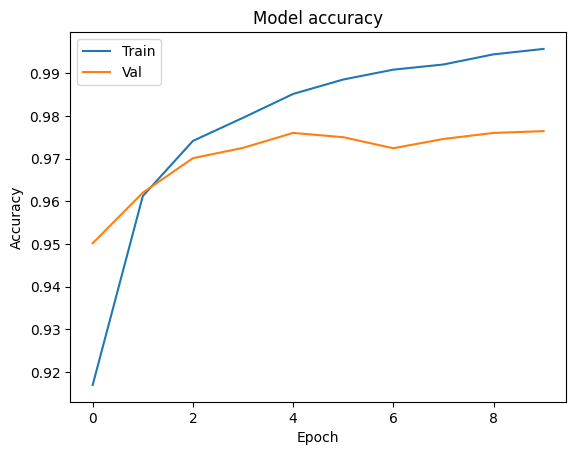

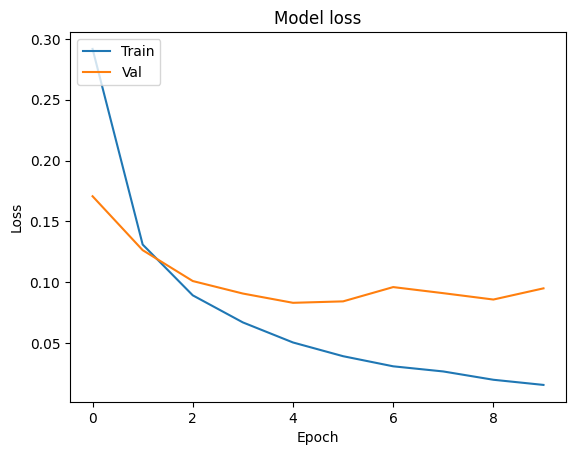

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


## **6.1 Confusion Matrix**

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

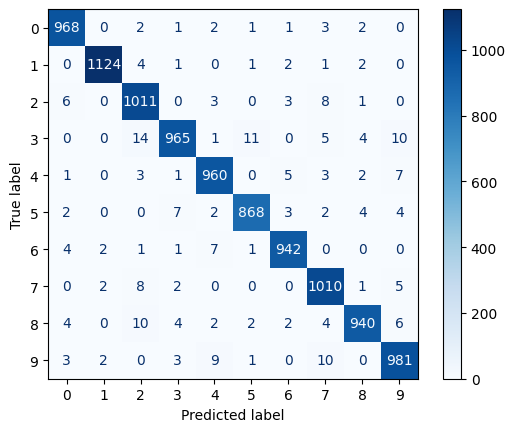

In [ ]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels)).plot(values_format='d', cmap='Blues')
plt.show()

In this code:

- `confusion_matrix=cm`: Specifies the confusion matrix data.
- `display_labels=np.unique(y_test)`: Sets the labels for the confusion matrix from the unique values in `y_test`. Adjust this as necessary for your dataset.
- `.plot(values_format='d', cmap='Blues')`: Plots the confusion matrix with integer formatting (`'d'`) and a blue color map. You can customize the appearance further through these parameters.

## **6.2 calculate precision, recall, f1-score**

F1 score:

$F1=2×(precision×recall) / (precision+recall)$

In [ ]:
print(classification_report(y_true=test_labels,y_pred = y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9798    0.9878    0.9837       980
           1     0.9947    0.9903    0.9925      1135
           2     0.9601    0.9797    0.9698      1032
           3     0.9797    0.9554    0.9674      1010
           4     0.9736    0.9776    0.9756       982
           5     0.9808    0.9731    0.9769       892
           6     0.9833    0.9833    0.9833       958
           7     0.9656    0.9825    0.9740      1028
           8     0.9833    0.9651    0.9741       974
           9     0.9684    0.9722    0.9703      1009

    accuracy                         0.9769     10000
   macro avg     0.9769    0.9767    0.9768     10000
weighted avg     0.9770    0.9769    0.9769     10000



# **7. Assessment Tasks**

- 7.1. **Modify the Network Architecture**: Change the number of neurons in the hidden layer or add more hidden layers to see how it affects accuracy.
- 7.2. **Experiment with Different Optimizers**: Use different optimizers like SGD or RMSprop and compare the results.
- 7.3. **Visualize Incorrect Predictions**: Write code that identifies and displays images from the test set that were incorrectly classified.

In [ ]:
#Ex 7.1
# YOUR CODE HERE

In [ ]:
#Ex 7.2
# YOUR CODE HERE

In [ ]:
#Ex 7.3
# YOUR CODE HERE

By: Merav Varsano for M'aala (Davidson Ins.) ©